In [1]:
#import require python classes and packages
import pandas as pd #pandas to read and explore dataset
import numpy as np
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm #SVM class
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
#class to apply differential privacy on dataset to secured model from attacks
from pydp.algorithms.laplacian import BoundedSum
#kmeans to cluster related data and then removed out unrelated data to increase model security 
from sklearn.cluster import KMeans
#homomorphic class to perturb training data
from Homomorphic import perturbData

In [12]:
#loading and displaying heart disease dataset
dataset = pd.read_csv("Dataset/heart.csv")
columns = dataset.columns
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
#describing dataset with details like count, mean, standard deviation of each dataset attributes
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


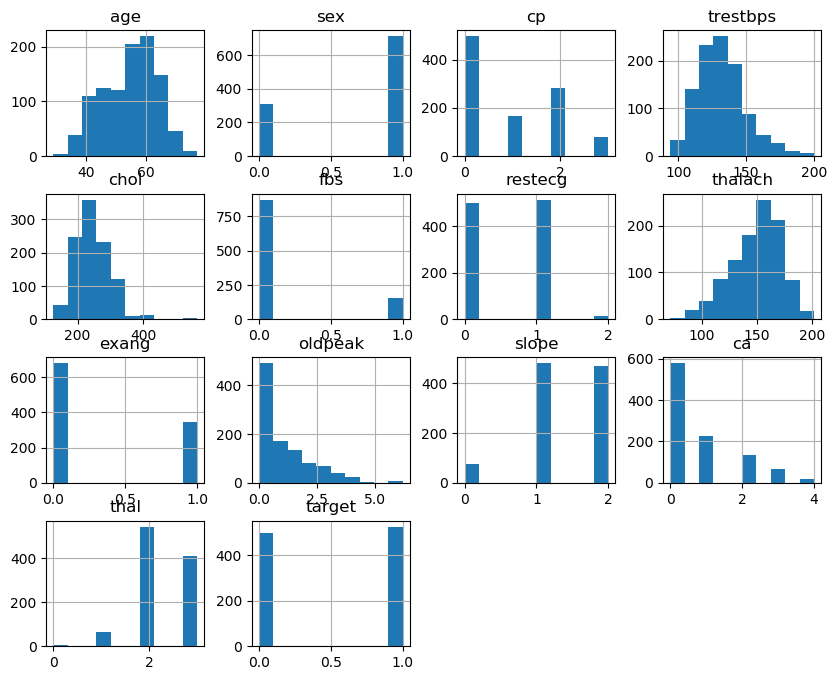

In [14]:
#visualizing distribution of numerical data
dataset.hist(figsize=(10, 8))
plt.title("Representation of Dataset Attributes")
plt.show()

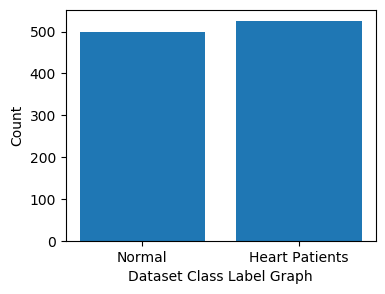

In [15]:
#finding & plotting graaph of normal and heart disease patinets available in dataset
#visualizing class labels count found in dataset
names, count = np.unique(dataset['target'].ravel(), return_counts = True)
height = count
bars = ['Normal', 'Heart Patients']
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.show()

In [16]:
#securing ML model by applying extension KMEANS clustering which will group similar data into same cluster and put
#unrelated data into different cluster and by applying this extension technique we will train model with related data
print("Dataset Size before removing unrelated Data : "+str(dataset.shape[0]))
data = dataset.values
X = data[:,0:data.shape[1] - 1]
Y = data[:,data.shape[1] - 1]
XX = []
YY = []
#defining KMEANS to group related data
kmeans = KMeans(n_clusters=3, n_init=50, random_state=1)
kmeans.fit(X)
clusters = kmeans.labels_
labels, count = np.unique(clusters, return_counts=True)
irrelevant = 0
counter = X.shape[0]
#find out label of unrelated data
for i in range(len(count)):
    if count[i] < counter:
        counter = count[i]
        irrelevant = labels[i]
#collect only related data and avoid unrelated data        
for i in range(len(clusters)):
    if clusters[i] != irrelevant:
        XX.append(X[i])
        YY.append(Y[i])
X = np.asarray(XX)
Y = np.asarray(YY)
print("Dataset Size after removing unrelated Data : "+str(X.shape[0]))

Dataset Size before removing unrelated Data : 1025
Dataset Size after removing unrelated Data : 821


In [17]:
#now apply Differential Privacy algorithm on dataset training features to provide security to model
df_X = []
dp = BoundedSum(epsilon= 1.5, lower_bound =  0.1, upper_bound = 100, dtype ='float') 
noise = dp.quick_result(dataset['age'].to_list())
for i in range(len(X)):
    temp = []
    for j in range(len(X[i])):
        temp.append(X[i,j] + noise)
    df_X.append(temp)    
df_X = np.asarray(df_X)   
temp = pd.DataFrame(df_X, columns = columns[0:len(columns)-1].values)
print("Training Features after applying Differential Privacy")
temp

Training Features after applying Differential Privacy


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56027.396936,55976.396936,55975.396936,56100.396936,56187.396936,55975.396936,55976.396936,56143.396936,55975.396936,55976.396936,55977.396936,55977.396936,55978.396936
1,56028.396936,55976.396936,55975.396936,56115.396936,56178.396936,55976.396936,55975.396936,56130.396936,55976.396936,55978.496936,55975.396936,55975.396936,55978.396936
2,56045.396936,55976.396936,55975.396936,56120.396936,56149.396936,55975.396936,55976.396936,56100.396936,55976.396936,55977.996936,55975.396936,55975.396936,55978.396936
3,56036.396936,55976.396936,55975.396936,56123.396936,56178.396936,55975.396936,55976.396936,56136.396936,55975.396936,55975.396936,55977.396936,55976.396936,55978.396936
4,56033.396936,55975.396936,55975.396936,56075.396936,56223.396936,55975.396936,55975.396936,56097.396936,55975.396936,55976.396936,55976.396936,55975.396936,55977.396936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,56034.396936,55976.396936,55976.396936,56115.396936,56196.396936,55975.396936,55976.396936,56139.396936,55976.396936,55975.396936,55977.396936,55975.396936,55977.396936
817,56035.396936,55976.396936,55975.396936,56100.396936,56233.396936,55975.396936,55975.396936,56116.396936,55976.396936,55978.196936,55976.396936,55976.396936,55978.396936
818,56022.396936,55976.396936,55975.396936,56085.396936,56250.396936,55975.396936,55975.396936,56093.396936,55976.396936,55976.396936,55976.396936,55976.396936,55977.396936
819,56025.396936,55975.396936,55975.396936,56085.396936,56229.396936,55975.396936,55975.396936,56134.396936,55975.396936,55975.396936,55977.396936,55975.396936,55977.396936


In [18]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [19]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    labels = ['Normal', 'Heart Patient']
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 4))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

In [20]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 821
Total features found in dataset= 13
80% dataset for training : 656
20% dataset for testing  : 165


Decision Tree Differential Privacy Accuracy  : 98.18181818181819
Decision Tree Differential Privacy Precision : 98.27586206896552
Decision Tree Differential Privacy Recall    : 98.14814814814814
Decision Tree Differential Privacy FSCORE    : 98.17941079112876


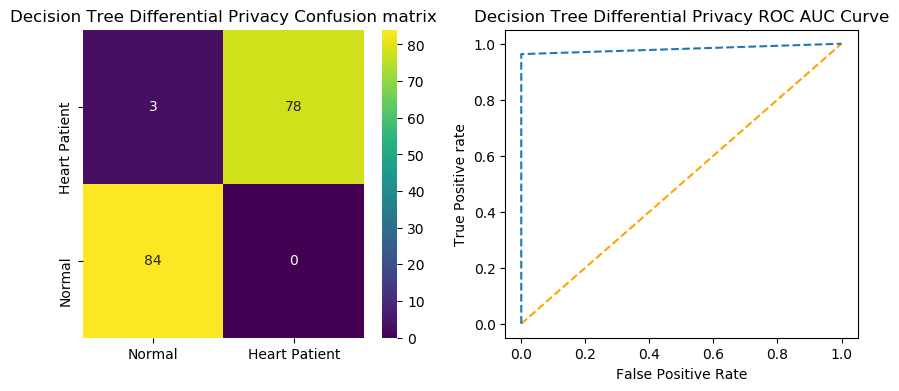

In [21]:
#training and evaluating performance of decision tree algorithm
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)#train algorithm using training features and target value
predict =dt_cls.predict(X_test)#perform prediction on test data
#call this function with true and predicted values to calculate accuracy and other metrics
calculateMetrics("Decision Tree Differential Privacy", y_test, predict)

In [22]:
#now perturbed training data using Homomorphic Encryption
homo_X = perturbData(X)#calling PerturnData function from Homomorphic class to encrypt dataset
temp = pd.DataFrame(homo_X, columns = columns[0:len(columns)-1].values)
print("Training Features after applying Homomorphic Encryption")
temp

Training Features after applying Homomorphic Encryption


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3680,416,352,8352,13920,352,416,11104,352,416,480,480,544
1,3744,416,352,9312,13344,416,352,10272,416,544,352,352,544
2,4832,416,352,9632,11488,352,416,8352,416,480,352,352,544
3,4256,416,352,9824,13344,352,416,10656,352,352,480,416,544
4,4064,352,352,6752,16224,352,352,8160,352,416,416,352,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,4128,416,416,9312,14496,352,416,10848,416,352,480,352,480
817,4192,416,352,8352,16864,352,352,9376,416,480,416,416,544
818,3360,416,352,7392,17952,352,352,7904,416,416,416,416,480
819,3552,352,352,7392,16608,352,352,10528,352,352,480,352,480


Decision Tree Homomorphic Encryption Accuracy  : 100.0
Decision Tree Homomorphic Encryption Precision : 100.0
Decision Tree Homomorphic Encryption Recall    : 100.0
Decision Tree Homomorphic Encryption FSCORE    : 100.0


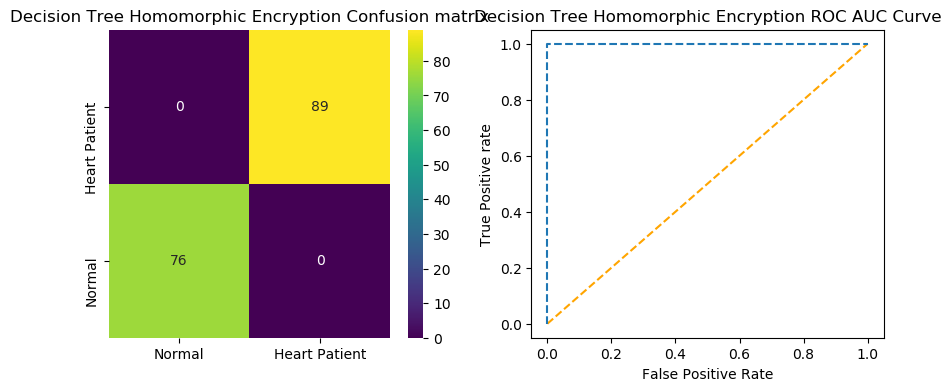

In [23]:
X_train, X_test, y_train, y_test = train_test_split(homo_X, Y, test_size = 0.2)
#training and evaluating performance of decision tree algorithm
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)#train algorithm using training features and target value
predict =dt_cls.predict(X_test)#perform prediction on test data
#call this function with true and predicted values to calculate accuracy and other metrics
calculateMetrics("Decision Tree Homomorphic Encryption", y_test, predict)

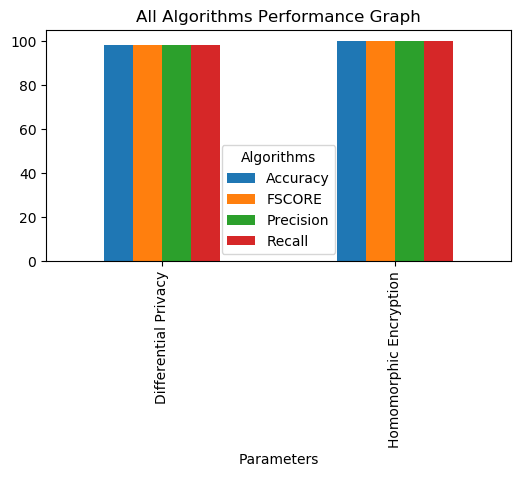

In [24]:
#comparison graph between all algorithms
df = pd.DataFrame([['Differential Privacy','Accuracy',accuracy[0]],['Differential Privacy','Precision',precision[0]],['Differential Privacy','Recall',recall[0]],['Differential Privacy','FSCORE',fscore[0]],
                   ['Homomorphic Encryption','Accuracy',accuracy[1]],['Homomorphic Encryption','Precision',precision[1]],['Homomorphic Encryption','Recall',recall[1]],['Homomorphic Encryption','FSCORE',fscore[1]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(6, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [25]:
#display all algorithm performnace
algorithms = ['Differential Privacy', 'Homomorphic Encryption']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data   

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Differential Privacy,98.181818,98.275862,98.148148,98.179411
1,Homomorphic Encryption,100.000000,100.000000,100.000000,100.000000
